In [27]:
library(dplyr)
library(ggplot2)

In [28]:
### Harmony corrected PCA for all day 52 cells

In [29]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
filename = paste0(mydir,"pool1_17_D52.scanpy.dimreduction.harmonyPCA.tsv")

In [30]:
df = read.csv(filename, sep = "\t")
head(df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
AAACCTGAGAAAGTGG-1-0,-5.104239,9.886840,4.60978941,-6.5451223,8.2315778,3.945303,-0.8844605,1.7741598,1.3352407,-1.103909,...,0.4663180,0.8122565,1.5829590,-1.8375968,-0.5688820,-0.4898580,-1.6154334,-0.5708719,0.02656536,1.2329471
AAACCTGAGATCTGCT-1-0,-7.725349,4.146478,-0.01496614,-5.3041565,-0.3797163,2.178033,0.6385038,0.5732125,0.5594368,-2.965901,...,0.6956724,0.6029649,-4.3561376,-0.8535823,0.8326317,1.5879197,1.2549221,-2.0153846,1.43107255,1.5092337
AAACCTGAGCTAGTGG-1-0,22.527179,1.776619,-2.18050576,0.1603308,-1.8163934,-0.227405,1.7230424,-1.6876156,1.0149145,-0.921135,...,-0.5411988,0.4930924,-0.1628703,-2.9728354,-1.2915667,0.7910793,-1.3855855,1.3433775,-1.04475066,1.5382338
AAACCTGAGGAGCGTT-1-0,-1.706279,-12.850743,2.63706688,0.6206723,-0.2064441,5.521089,-0.6396233,-1.9702535,1.1769675,1.322094,...,-1.7856121,-0.2955901,0.0957970,-0.5488211,1.1304449,-1.6795769,-0.2930593,-1.5527088,0.58208785,1.1824614
AAACCTGAGGTGCTTT-1-0,-8.901477,7.098307,5.98557883,-8.7939237,-1.0949268,1.534121,0.6509907,1.2637556,-0.2021763,-4.528739,...,-0.4655283,2.0145883,1.1561932,-0.1805866,1.2734463,0.1063479,0.6201252,-1.0623467,-0.49898085,-2.2306966
AAACCTGCACCCATGG-1-0,-4.145123,-14.535656,5.69486919,-0.7778741,0.4487712,-5.004496,0.7838308,3.3537959,-0.2926826,-2.059134,...,1.7058880,0.6402297,0.5934561,1.2574489,-0.9614093,0.7151519,-0.8891727,2.0602550,0.12318977,-0.4728717


In [31]:
### SCE object
# count + metadata (DA D52 only)

In [33]:
sce_R_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/all_da_d52_cells_sce.Rds"
sce = readRDS(sce_R_filename)
sce

class: SingleCellExperiment 
dim: 32738 79801 
metadata(0):
assays(1): counts
rownames(32738): MIR1302-10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(79801): CCAGCGAGTTACTGAC-1-64 ACGCAGCGTTCGCTAA-1-45 ...
  CTTAGGAAGATTACCC-1-13 TCAACGACATAGAAAC-1-39
colData names(21): batch celltype ... treatment index
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [34]:
## 196 unique donors
length(unique(sce$donor_id))

[1] 196

In [35]:
## number of cells per donor varies widely, from 1 to 5,332
min(table(sce$donor_id))
mean(table(sce$donor_id))
max(table(sce$donor_id))

[1] 1

[1] 407.148

[1] 5332

In [36]:
## one parameter to tune could be the minimum number of cells per donod
## for the donor to be included (with default the minimum)
x = c(0,5,10,20,50,100,200)
y=c()
for (N in x){
    y = c(y,length(table(sce$donor_id)[table(sce$donor_id)>N]))
    print(c(N, length(table(sce$donor_id)[table(sce$donor_id)>N])))
}

[1]   0 196
[1]   5 187
[1]  10 179
[1]  20 166
[1]  50 146
[1] 100 125
[1] 200  91


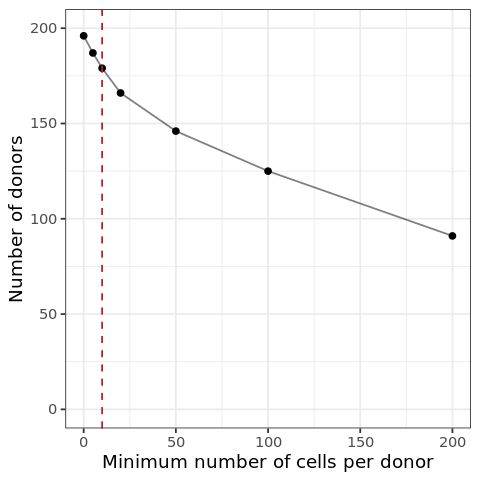

In [37]:
df_ncells = data.frame(x=x,y=y)
ggplot(df_ncells, aes(x=x,y=y)) + geom_point() + geom_line(alpha = 0.5) + theme_bw() +
    xlab("Minimum number of cells per donor") + ylab("Number of donors") + ylim(c(0,200)) +
    geom_vline(xintercept = 10, col = "firebrick", linetype = "dashed")

In [38]:
### Filter SCE object
ncol(sce)
######
# consider only untreated cells
sce_filt = sce[,sce$treatment == 'NONE']
######
# consider only donors with > 10 cells
N=10
donors_keep = names(table(sce_filt$donor_id)[table(sce_filt$donor_id)>N])
sce_filt = sce_filt[, sce_filt$donor_id %in% donors_keep]  
ncol(sce_filt)

[1] 79801

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] 54217

In [39]:
### Filter PCs to only cells of interest 
## (consider re-computing these for these cells only instead)
nrow(df)
cells_keep = colnames(sce_filt)
df_filt = df[cells_keep,]
nrow(df_filt)

[1] 523094

[1] 54217

In [40]:
P = 20 # set number of PCs to consider
data_all = df_filt[,c(1:P)]
dim(data_all)

[1] 54217    20

In [41]:
#### Get clusters (pseudo-cells) for each donor

In [50]:
df_clusters = data.frame()
for (i in 1:length(unique(sce_filt$donor_id))){
    ## loop through donors
    donor = unique(sce_filt$donor_id)[i]
    ## select cells
    donor_cells = colnames(sce_filt[,sce_filt$donor_id == donor])
    data = data_all[donor_cells,] # select PCs to cells
    ## compute kNNs (k=5,10,20)
    k=20
    nd <- RANN::nn2(data, query = data, k = min(k,length(donor_cells)))
    ## cluster graph
    cl <- louvainCluster(nd, data)
    n_clusters = length(cl)
    ## build cluster data.frame
    for (j in 1:n_clusters){
        df_clusters = rbind(df_clusters, data.frame(cell = cl[[j]], 
                                                cluster = paste0("cluster",j),
                                                donor_id = donor,
                                                ncells = length(cl[[j]])))
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning messa

“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is

“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is

In [51]:
df_clusters$pseudo_cell = paste0(df_clusters$donor_id,"-",df_clusters$cluster)

In [52]:
head(df_clusters)

cell,cluster,donor_id,ncells,pseudo_cell
CCAGCGAGTTACTGAC-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GATCTAGCATCCAACA-1-65,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
TGGCCAGCAAGCTGTT-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GCTGCGACAAGGACAC-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
ACATGGTGTTATCACG-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1
GTTACAGCACAGAGGT-1-64,cluster1,HPSI0513i-veve_2,88,HPSI0513i-veve_2-cluster1


In [53]:
length(unique(df_clusters$donor_id))

[1] 173

In [54]:
# write.csv(df_clusters, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_10nn.csv")
# write.csv(df_clusters, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_5nn.csv")
write.csv(df_clusters, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_20nn.csv")

In [55]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_d52_untreated_pseudocells_20_harmony_PCs_atleast10cells_20nn.csv"
df_clusters = read.csv(filename, row.names=1)

In [56]:
length(unique(df_clusters$pseudo_cell))

[1] 1013

In [57]:
# k = 5,  1-360 cells per pseudocell
# k = 10, 3-597 cells per pseudocell
# k = 20, 1-572 cells per pseudocell
min(df_clusters$ncells)
max(df_clusters$ncells)

[1] 1

[1] 572

In [24]:
df_summary = df_clusters %>% group_by(donor_id) %>% summarise(mean = mean(ncells), sum = n(), nclusters = n_distinct(cluster))

In [25]:
head(df_summary)

donor_id,mean,sum,nclusters
HPSI0114i-kolf_2,64.38940,547,9
HPSI0114i-rozh_4,19.05000,40,3
HPSI0114i-wegi_1,66.96970,330,6
HPSI0114i-zapk_2,116.64129,775,7
HPSI0115i-aion_2,30.83333,180,6
HPSI0115i-aoxv_1,51.79325,237,5


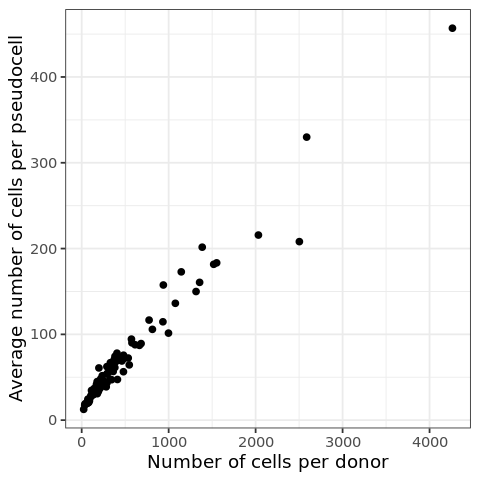

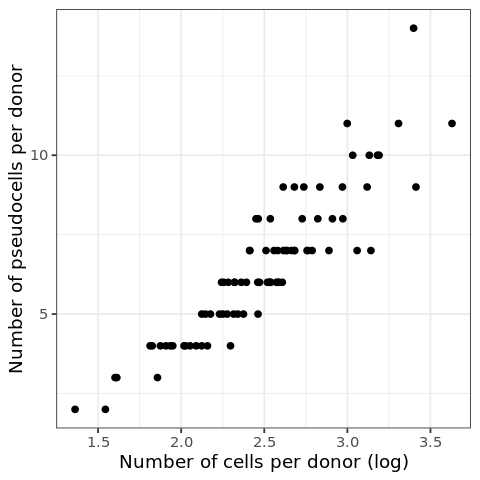

In [26]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df_summary, aes(x=sum, y=mean)) + geom_point() + 
    xlab("Number of cells per donor") + ylab("Average number of cells per pseudocell") + theme_bw()
ggplot(df_summary, aes(x=log10(sum), y=nclusters)) + geom_point() + 
    xlab("Number of cells per donor (log)") + ylab("Number of pseudocells per donor") + theme_bw()

In [109]:
for (i in 1:length(unique(sce_filt$donor_id))){
    donor = unique(sce_filt$donor_id)[i]
    donor_cells = colnames(sce_filt[,sce_filt$donor_id == donor])
    print(c(i, donor, length(donor_cells)))
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "1"                "HPSI0513i-veve_2" "535"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "2"                "HPSI1014i-babz_3" "296"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "3"                "HPSI0215i-hipn_1" "362"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "4"                "HPSI1014i-qayj_4" "2503"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "5"                 "HPSI0413i-coxy_33" "939"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "6"                "HPSI0114i-kolf_2" "547"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "7"                "HPSI0514i-lako_1" "813"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "8"                "HPSI0714i-pipw_4" "934"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "9"                "HPSI0215i-deyz_2" "1386"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "10"               "HPSI0715i-meue_5" "578"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "11"               "HPSI0215i-fawm_2" "219"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "12"               "HPSI0614i-wihj_4" "1145"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "13"               "HPSI1213i-hehd_1" "480"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "14"               "HPSI0513i-uoxz_4" "434"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "15"               "HPSI0914i-euts_3" "65"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "16"               "HPSI1113i-podx_1" "1356"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "17"               "HPSI0413i-peop_4" "346"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "18"               "HPSI0314i-cuhk_2" "247"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "19"               "HPSI0115i-paim_1" "4263"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "20"               "HPSI0813i-zexw_3" "259"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "21"               "HPSI0513i-giuf_1" "89"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "22"               "HPSI0914i-yuvg_2" "150"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "23"                "HPSI0613i-oomz_22" "178"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "24"               "HPSI0514i-fiaj_1" "1552"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "25"               "HPSI0813i-mioj_1" "429"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "26"               "HPSI0514i-tert_1" "86"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "27"               "HPSI1114i-kuul_1" "572"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "28"               "HPSI0513i-sucd_3" "289"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "29"               "HPSI0414i-sebn_3" "342"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "30"                "HPSI0513i-oarz_22" "1077"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "31"               "HPSI0114i-zapk_2" "775"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "32"               "HPSI0214i-pelm_3" "1518"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "33"               "HPSI0813i-uaqe_1" "67"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "34"               "HPSI0913i-iuqb_1" "291"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "35"               "HPSI0214i-rayr_1" "170"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "36"               "HPSI0115i-gost_2" "998"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "37"               "HPSI0614i-juzt_4" "133"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "38"               "HPSI0214i-giju_3" "210"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "39"               "HPSI0115i-jakt_1" "339"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "40"               "HPSI1014i-roug_3" "2032"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "41"               "HPSI1014i-eesb_1" "2587"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "42"               "HPSI1013i-woci_1" "35"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "43"               "HPSI0813i-wots_3" "175"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "44"               "HPSI0514i-sohd_2" "207"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "45"               "HPSI0614i-uevq_6" "344"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "46"               "HPSI0414i-mita_1" "106"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "47"               "HPSI0514i-uenn_3" "209"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "48"               "HPSI1014i-quls_2" "140"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "49"               "HPSI0414i-uawq_2" "230"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "50"               "HPSI0115i-sehp_2" "614"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "51"               "HPSI0914i-vaka_5" "383"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "52"               "HPSI0413i-nudd_1" "133"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "53"               "HPSI1014i-tixi_4" "144"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "54"               "HPSI1014i-sehl_6" "198"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "55"               "HPSI0514i-puie_4" "381"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "56"               "HPSI0114i-rozh_4" "40"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "57"               "HPSI0513i-momt_2" "683"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "58"               "HPSI0115i-hecn_6" "481"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "59"               "HPSI0115i-aion_2" "180"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "60"               "HPSI1113i-hayt_3" "411"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "61"               "HPSI0514i-rutc_2" "282"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "62"               "HPSI0214i-poih_2" "1315"            


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "63"               "HPSI0414i-xojn_3" "481"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "64"               "HPSI0115i-quze_6" "23"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "65"               "HPSI0813i-iill_3" "123"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "66"               "HPSI1113i-vuud_2" "406"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "67"               "HPSI0914i-jejf_2" "664"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "68"               "HPSI1013i-hiaf_1" "374"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "69"               "HPSI0514i-yewo_4" "72"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "70"               "HPSI0514i-oekw_2" "81"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "71"               "HPSI0115i-iuad_2" "387"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "72"               "HPSI0613i-lizq_3" "258"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "73"               "HPSI0714i-kute_5" "113"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "74"               "HPSI0115i-timk_4" "290"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "75"               "HPSI0115i-aoxv_1" "237"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "76"               "HPSI0215i-zett_5" "462"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "77"               "HPSI0314i-qaqx_1" "75"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "78"               "HPSI0414i-seru_1" "192"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "79"               "HPSI0115i-kozf_1" "104"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "80"               "HPSI0914i-laey_6" "189"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "81"               "HPSI0114i-wegi_1" "330"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "82"               "HPSI0215i-uiao_2" "324"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "83"               "HPSI0814i-siqu_4" "413"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "84"               "HPSI0115i-iiyk_2" "41"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "85"               "HPSI1014i-tuju_1" "11"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "86"               "HPSI0314i-sojd_3" "115"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "87"               "HPSI0114i-posc_1" "62"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "88"               "HPSI0914i-kajh_2" "33"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "89"               "HPSI0614i-liqa_1" "409"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "90"               "HPSI0715i-zaie_5" "169"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "91"               "HPSI0613i-aevs_1" "237"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "92"               "HPSI0715i-aowh_2" "366"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "93"               "HPSI0514i-oupf_6" "118"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "94"               "HPSI0813i-aizi_3" "77"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "95"               "HPSI0613i-bohf_1" "646"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "96"               "HPSI0115i-tiku_3" "71"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "97"               "HPSI0813i-peoj_1" "31"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "98"               "HPSI0714i-iudw_1" "298"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "99"               "HPSI1014i-vils_1" "223"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "100"              "HPSI0914i-zerv_7" "265"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "101"              "HPSI0115i-jotn_2" "367"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "102"              "HPSI0714i-burb_1" "223"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "103"              "HPSI0115i-uupc_2" "43"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "104"              "HPSI0514i-letw_1" "264"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "105"              "HPSI1113i-qorq_1" "274"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "106"              "HPSI1013i-garx_2" "239"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "107"              "HPSI0513i-dipe_1" "149"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "108"              "HPSI0613i-bawa_1" "350"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "109"              "HPSI0215i-romx_1" "101"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "110"              "HPSI0613i-qony_1" "106"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "111"              "HPSI0214i-heth_1" "92"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "112"              "HPSI0913i-eorc_2" "207"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "113"              "HPSI0914i-ouvb_2" "269"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "114"              "HPSI0514i-wiii_3" "176"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "115"              "HPSI1013i-jufd_3" "51"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "116"               "HPSI0513i-aipt_33" "271"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "117"              "HPSI0513i-oibg_1" "69"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "118"              "HPSI1113i-bima_1" "170"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "119"              "HPSI0714i-keui_4" "260"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "120"              "HPSI0914i-suop_5" "149"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "121"              "HPSI0914i-iezw_2" "248"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "122"              "HPSI0814i-bokz_6" "39"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "123"              "HPSI0613i-hikj_2" "128"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "124"              "HPSI1114i-ualf_6" "14"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "125"              "HPSI0314i-bubh_3" "25"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "126"              "HPSI0114i-lexy_2" "96"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "127"              "HPSI0613i-hegp_3" "85"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "128"              "HPSI0514i-naah_2" "155"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "129"              "HPSI0214i-eiwy_1" "54"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "130"              "HPSI0614i-voce_1" "31"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "131"              "HPSI0513i-debk_9" "128"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "132"              "HPSI0614i-oicx_2" "33"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "133"              "HPSI0214i-datg_2" "281"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "134"              "HPSI0114i-eipl_1" "189"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "135"              "HPSI0813i-ffdc_1" "25"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "136"               "HPSI0713i-aehn_22" "42"               


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "137"              "HPSI1013i-sita_1" "34"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "138"              "HPSI0413i-yotv_2" "129"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "139"              "HPSI0214i-feec_2" "57"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "140"              "HPSI1013i-kuxp_1" "21"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "141"              "HPSI0115i-gifk_1" "45"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "142"              "HPSI0814i-doao_1" "58"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "143"              "HPSI0215i-yoch_6" "15"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "144"              "HPSI0214i-kucg_2" "54"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "145"              "HPSI0614i-qunz_2" "57"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "146"              "HPSI0513i-fejf_2" "117"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "147"              "HPSI0115i-bimq_4" "50"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "148"              "HPSI0314i-hoik_1" "71"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "149"               "HPSI0613i-liun_22" "90"               


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "150"              "HPSI0114i-bezi_3" "66"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "151"              "HPSI0913i-ruql_3" "141"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "152"              "HPSI1114i-zuuy_4" "25"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "153"              "HPSI0314i-xugn_2" "37"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "154"              "HPSI0413i-corn_1" "30"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "155"              "HPSI0115i-boqx_2" "23"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "156"              "HPSI0314i-wigw_2" "50"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "157"              "HPSI0215i-oilg_1" "37"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "158"              "HPSI0514i-qihv_1" "17"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "159"              "HPSI0513i-suzg_3" "66"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "160"              "HPSI0714i-oatm_1" "12"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "161"              "HPSI0314i-uict_1" "16"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "162"              "HPSI0613i-eojr_2" "31"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "163"              "HPSI1113i-qolg_1" "131"             


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "164"              "HPSI0414i-oaqd_2" "10"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "165"              "HPSI0614i-lirf_5" "41"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "166"              "HPSI0614i-puhk_2" "57"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "167"              "HPSI0614i-miaj_4" "37"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "168"              "HPSI0114i-fikt_3" "26"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "169"              "HPSI0513i-dulv_1" "18"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "170"              "HPSI0813i-guss_1" "10"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "171"              "HPSI1014i-kefb_1" "9"               


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "172"              "HPSI0914i-rejf_2" "18"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "173"               "HPSI0213i-nawk_55" "6"                


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "174"              "HPSI0115i-qecv_2" "16"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "175"              "HPSI1113i-ieki_3" "13"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "176"              "HPSI0414i-ceik_1" "22"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "177"              "HPSI0414i-gesg_2" "7"               


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "178"              "HPSI0114i-vass_1" "34"              


Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "179"              "HPSI0613i-xavk_3" "4"               


In [250]:
# select one donor
donor = unique(sce_filt$donor_id)[4] # 15, 42, 56, 64, 97, 124
donor_cells = colnames(sce_filt[,sce_filt$donor_id == donor])
donor
length(donor_cells)

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

[1] "HPSI1014i-qayj_4"

[1] 2503

In [251]:
data = data_all[donor_cells,]
dim(data)

[1] 2503   20

In [252]:
nd <- RANN::nn2(data, query = data, k = 5)

In [253]:
str(nd)

List of 2
 $ nn.idx  : int [1:2503, 1:5] 1 2 3 4 5 6 7 8 9 10 ...
 $ nn.dists: num [1:2503, 1:5] 0 0 0 0 0 0 0 0 0 0 ...


In [16]:
#' Applies the Louvain algorithm to generate micro-clustered data (Vision)
#'
#' @param kn List of nearest neighbor indices and euclidean distances to these
#' nearest neighbors
#' @param data Data matrix
#' @return List of clusters, each entry being a vector of indices representing
#' samples in the cluster.
louvainCluster <- function(kn, data) {

    nn <- kn[[1]]
    d <- kn[[2]]
    sigma <- apply(d, 1, function(x) quantile(x, c(.5))[[1]])
    d <- exp(-1 * (d*d) / sigma^2)

    nnl <- lapply(1:nrow(nn), function(i) nn[i,])

    # Create an undirected knn graph
    g <- igraph::graph_from_adj_list(nnl, mode="out")
    igraph::E(g)$weights <- as.vector(t(d))
    g <- igraph::as.undirected(g, mode="each")

    # Now apply the louvain algorithm to cluster the graph
    cl <- igraph::cluster_louvain(g)

    # Gather cluster vector to list of clusters
    clusters <- list()
    mem <- as.vector(igraph::membership(cl))
    for (i in 1:length(mem)) {
        n <- as.character(mem[[i]])
        if (n %in% names(clusters)) {
            clusters[[n]] <- c(clusters[[n]], i)
        } else {
            clusters[[n]] <- c(i)
        }
    }

    clusters <- lapply(clusters, function(i) i <- rownames(data)[i])

    return(clusters)

}

In [255]:
cl <- louvainCluster(nd, data)

In [256]:
n_clusters = length(cl)
n_clusters 

[1] 24

In [257]:
n = 0
for (i in 1:n_clusters){
    print(length(cl[[i]]))
    n = n+length(cl[[i]])
    }
c(n_clusters,n)

[1] 157
[1] 71
[1] 67
[1] 89
[1] 121
[1] 83
[1] 36
[1] 184
[1] 81
[1] 132
[1] 43
[1] 129
[1] 150
[1] 125
[1] 119
[1] 74
[1] 122
[1] 80
[1] 145
[1] 99
[1] 184
[1] 28
[1] 108
[1] 76


[1]   24 2503

In [182]:
df_clusters = data.frame()
for (i in 1:n_clusters){
    df_clusters = rbind(df_clusters, data.frame(cell = cl[[i]], 
                                                cluster = paste0("cluster",i),
                                                donor = donor,
                                                ncells = length(cl[[i]])))
    }
df_clusters

cell,cluster,donor,ncells
ACGCAGCAGGATGGTC-1-50,cluster1,HPSI0414i-oaqd_2,1
CTAACTTTCCAATGGT-1-49,cluster2,HPSI0414i-oaqd_2,1
TGCGCAGTCCTATGTT-1-51,cluster3,HPSI0414i-oaqd_2,1
GGAACTTAGAGCTATA-1-51,cluster4,HPSI0414i-oaqd_2,1
AAAGTAGGTAAGGGCT-1-49,cluster5,HPSI0414i-oaqd_2,1
GGACATTTCGTGACAT-1-51,cluster6,HPSI0414i-oaqd_2,1
GGAGCAAGTCGCGAAA-1-48,cluster7,HPSI0414i-oaqd_2,1
GGCAATTTCCCTTGTG-1-48,cluster8,HPSI0414i-oaqd_2,1
GATCGTACAATGAATG-1-51,cluster9,HPSI0414i-oaqd_2,1
CGCTATCCATGGGACA-1-50,cluster10,HPSI0414i-oaqd_2,1
